# Modulação Digital em Banda Passante - Lista de Exercícios 04

Aluno:
  * João Mário C. I. Lago

---

# Bibliotecas e Imports

In [ ]:
%pip install -q numpy scipy tabulate matplotlib

In [2]:
import tabulate
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import erfcinv, erfc

# Questões

## 1)

A modulação BPSK é utilizada para realizar a transmissão em um sistema de comunicação em banda passante. A taxa de transmissão é de 1 Mbps, a BER máxima permitida é $10^{-6}$ e a onda portadora possui frequência de 2 MHz. Com base nessas informações, determine:

* a) A largura de banda mínima do canal necessária para realizar a transmissão.
* b) A frequência superior, central e inferior do sinal transmitido.
* c) O menor valor da razão $E_b/N_0$ que atenda à BER exigida.

---

### Resolução

#### a) Largura de banda mínima

Na modulação **BPSK**, a largura de banda ocupa aproximadamente:

$$
B \approx 2 \cdot R_b = 2 \text{ MHz}
$$

---

#### b) Frequência inferior, central e superior

Para uma banda de 2 MHz centrada em 2 MHz:

* Frequência central: $f_c = 2$ MHz

* Largura de banda total: 2 MHz

* Frequência inferior:

  $$
  f_{\text{inf}} = f_c - \frac{B}{2} = 2 \text{ MHz} - 1 \text{ MHz} = 1 \text{ MHz}
  $$

* Frequência superior:

  $$
  f_{\text{sup}} = f_c + \frac{B}{2} = 2 \text{ MHz} + 1 \text{ MHz} = 3 \text{ MHz}
  $$

---

#### c) Menor valor da razão $E\_b/N\_0$ para BER = $10^{-6}$

Para BPSK:

$$
\text{BER} = Q\left(\sqrt{\frac{2E_b}{N_0}}\right)
$$

Para $\text{BER} = 10^{-6}$, temos:

$$
\frac{E_b}{N_0} \approx \frac{(Q^{-1}(10^{-6}))^2}{2}
$$

Sabemos que:

$$
Q^{-1}(10^{-6}) \approx 4.75342
$$

Logo:

$$
\frac{E_b}{N_0} = \frac{(4.75342)^2}{2} \approx 11.30
$$

Convertendo para dB:

$$
\left(\frac{E_b}{N_0}\right)_{dB} \approx 10 \log_{10}(11.30) \approx \boxed{10.53 \text{ dB}}
$$

---

## 2)

Pretende-se dimensionar um sistema de comunicação digital para operar em uma banda de 80 kHz com uma vazão de 130 kbps. São disponíveis dois tipos de moduladores: QPSK e 8-PSK.

**Qual modulador deve ser escolhido para obter a menor probabilidade de erro no receptor para uma mesma qualidade do canal?** Justifique e mostre os cálculos.

---

### Resolução

Para uma modulação $M$-PSK, a relação entre a taxa de bits e a taxa de símbolos é:

$$
R_s = \frac{R_b}{\log_2 M}
$$


#### QPSK:

$$
R_s = \frac{130 \, \text{kbps}}{\log_2(4)} = \frac{130 \, \text{kbps}}{2} = 65 \, \text{kbaud}
$$

Então:

$$
B \approx 2 \cdot 65 \, \text{kHz} = 130 \, \text{kHz}
$$

---

#### 8-PSK:

$$
R_s = \frac{130 \, \text{kbps}}{\log_2(8)} = \frac{130 \, \text{kbps}}{3} \approx 43.33 \, \text{kbaud}
$$

Então:

$$
B \approx 2 \cdot 43.33 \, \text{kHz} \approx 86.66 \, \text{kHz}
$$

A largura de banda ocupada por modulações PSK pode ser aproximada por:

$$
B \approx 2 \cdot R_s
$$

Portanto:

* QPSK → $B \approx 2 \cdot 65 = 130$ kHz
* 8-PSK → $B \approx 2 \cdot 43.33 = 86.66$ kHz

A **probabilidade de erro de símbolo (SER)** para M-PSK em canal AWGN é dada por:

$$
P_s \approx 2 Q\left( \sqrt{2 \frac{E_s}{N_0}} \sin\left(\frac{\pi}{M} \right) \right)
$$

Como $M$ aumenta, $\sin\left(\frac{\pi}{M}\right)$ diminui, portanto o **argumento da função $Q$ diminui**, resultando em **maior probabilidade de erro** para o mesmo $\frac{E\_s}{N\_0}$.

**Conclusão:**
  * Sem considerar restrições de largura de banda, **QPSK** é preferível por apresentar **menor probabilidade de erro** para o mesmo $E_s/N_0$.
  * Entretanto, a **largura de banda ocupada pela QPSK excede a faixa de 80 kHz**, enquanto a **8-PSK pode ser ajustada** com o uso de filtros de roll-off apropriado (ex: Raised Cosine com $\beta \leq 0.25$).
  * **Logo, a 8-PSK é a escolha mais adequada** neste caso, pois atende à **restrição de banda** e permite transmitir a **vazão desejada**.

---

## 3)

Um transmissor 16-PSK é utilizado para transmitir informação digital com uma taxa de 300 kbps. O sinal recebido pelo receptor foi observado durante 10 minutos e, com base em um código de detecção de erros, constatou-se que neste intervalo de tempo 10 símbolos foram detectados erroneamente. Com base nessas informações, determine:

* a) A duração de cada símbolo e a taxa de símbolos.
* b) A estimativa da taxa de erro de símbolo.
* c) A estimativa da taxa de erro de bit. (Considere a utilização do código de Gray).
* d) A estimativa da razão $E\_b/N\_0$ proporcionada pelo canal.

---

### Resolução

#### Duração de cada símbolo e taxa de símbolos

Sabendo que:

* Para 16-PSK: $\log_2(16) = 4$ bits por símbolo
* Logo, a taxa de símbolos é:

$$
R_s = \frac{R_b}{\log_2(16)} = \frac{300 \times 10^3}{4} = 75{,}000 \text{ símbolos/s}
$$

A **duração de cada símbolo**:

$$
T_s = \frac{1}{R_s} = \frac{1}{75{,}000} \approx 13{,}33 \, \mu s
$$

#### Estimativa da taxa de erro de símbolo (SER)

Tempo de observação:

$$
t = 10 \times 60 = 600 \text{ s}
$$

Número de símbolos transmitidos:

$$
N = R_s \cdot t = 75{,}000 \times 600 = 45{,}000{,}000
$$

Taxa de erro de símbolo:

$$
P_s = \frac{10}{45 \times 10^6} \approx 2{,}22 \times 10^{-7}
$$

#### Estimativa da taxa de erro de bit (BER)

Com codificação de Gray, a BER é aproximadamente:

$$
P_b \approx \frac{P_s}{\log_2 M} = \frac{2{,}22 \times 10^{-7}}{4} \approx 5{,}56 \times 10^{-8}
$$

#### Estimativa da razão $E_b/N_0$ do canal

Aproximação para modulação M-PSK com Gray:

$$
P_b \approx \frac{2}{\log_2 M} Q\left( \sqrt{2 \frac{E_b}{N_0}} \sin\left(\frac{\pi}{M} \right) \right)
$$

Inversão aproximada (assumindo alta SNR):

$$
\frac{E_b}{N_0} \approx \frac{1}{2} \left[ \frac{Q^{-1}(P_b \cdot \log_2 M / 2)}{\sin\left(\frac{\pi}{M}\right)} \right]^2
$$

Substituindo para \$M = 16\$, obtemos:

$$
\left(\frac{E_b}{N_0}\right)_{\text{dB}} \approx \boxed{25{,}47 \, \text{dB}}
$$

### Resumo

* $R_s = 75{,}000$ símbolos/s
* $T_s \approx 13{,}33 , \mu s$
* SER $= 2{,}22 \times 10^{-7}$
* BER $= 5{,}56 \times 10^{-8}$
* $\left( \frac{E_b}{N_0} \right)\_{\text{dB}} \approx 25{,}47$ dB

---

## 4)

A partir da representação geométrica das técnicas estudadas, discuta sobre o motivo pelo qual a técnica **M-FSK** apresenta uma menor **BER** que as técnicas **M-QAM** e **M-PSK** à medida que **M** é aumentado.

---

### Resolução

A **BER (bit error rate)** está fortemente relacionada com a **distância entre os símbolos** no espaço de sinal. A maneira como essa distância varia depende do tipo de modulação utilizada.


#### M-PSK (Phase Shift Keying):

* Representação geométrica: símbolos igualmente espaçados sobre uma **circunferência**.
* À medida que **M aumenta**, os pontos ficam **mais próximos angularmente**.
* Resultado: **menor distância mínima entre símbolos**, o que **aumenta a BER**.
* Outro ponto é a sensibilidade da fase ao ruído, tendo em vista que se M for grande a sensibilidade do receptor tem de ser muito alta, porém fase é uma grandeza que é muito sensível ao ruído, como doppler e multi-caminho.


#### M-QAM (Quadrature Amplitude Modulation):

* Representação geométrica: pontos dispostos em uma **grade retangular** (constelação quadrada).
* À medida que **M aumenta**, os pontos ficam **mais densos** (menor distância entre eles).
* Resultado: **maior probabilidade de erro** para uma mesma relação $E_b/N_0$.

#### M-FSK (Frequency Shift Keying):

* Representação: cada símbolo é transmitido por uma **frequência diferente**.
* Diferente de PSK/QAM, **os símbolos são ortogonais**, mesmo com M grande.
* Isso significa que é possível projetar um sistema onde **as frequências não interferem entre si**, mantendo **distância grande** entre os símbolos mesmo para valores altos de M.
* Preço a pagar é a largura de banda ocupada, o que impacta a eficiência espectral.

#### Conclusão

* A técnica **M-FSK** mantém **distâncias maiores entre símbolos** (frequências distintas) mesmo para altos valores de M, enquanto em **M-PSK** e **M-QAM** a densidade da constelação aumenta e a distância mínima entre símbolos diminui.
* Por isso, para um mesmo $E_b/N_0$, a **BER do M-FSK é menor** que a do M-QAM e M-PSK à medida que M aumenta.
* O preço a pagar pela FSK é o aumento da **largura de banda ocupada**, o que impacta a eficiência espectral.

---

## 5)

Pretende-se projetar um sistema de telecomunicação com **máxima taxa de transmissão possível**. Para isso, é disponível um canal com frequência de operação inicial em 900 MHz e final em 910 MHz. A máxima **BER admissível** é $10^{-6}$. Determine:

* O modulador que deve ser utilizado
* A frequência da portadora
* A taxa de transmissão alcançada
* A BER resultante para uma razão $E\_s/N\_0 = 20$ dB

---

### Resolução

#### Largura de banda do canal

$$
B = 910\,\text{MHz} - 900\,\text{MHz} = 10\,\text{MHz}
$$

In [3]:
import numpy as np
from scipy.special import erfc

# Dados do problema
BER_max = 10**-6
EsN0_dB = 20
EsN0_linear = 10 ** (EsN0_dB / 10)
BW_channel = 910e6 - 900e6  # 10 MHz
qam_orders = [4, 8, 16, 32, 64, 128, 256, 512, 1024]

def estimate_ber_qam(M, EsN0):
    k = np.log2(M)
    EbN0 = EsN0 / k
    arg = np.sqrt(3 * k / (M - 1) * EbN0)
    return (4 / k) * 0.5 * erfc(arg / np.sqrt(2))

results = []
for M in qam_orders:
    k = np.log2(M)
    ber = estimate_ber_qam(M, EsN0_linear)
    if ber <= BER_max:
        Rb = k * BW_channel
        results.append({
            "Modulação": f"{M}-QAM",
            "Eficiência espectral (bit/s/Hz)": k,
            "BER": ber,
            "Taxa de transmissão (bps)": Rb
        })

# Print results as table
print("Modulações que atendem BER ≤ 1e-6")
print(tabulate.tabulate(results, headers="keys", tablefmt="grid"))

Modulações que atendem BER ≤ 1e-6
+-------------+-----------------------------------+-------------+-----------------------------+
| Modulação   |   Eficiência espectral (bit/s/Hz) |         BER |   Taxa de transmissão (bps) |
+=============+===================================+=============+=============================+
| 4-QAM       |                                 2 | 1.52397e-23 |                       2e+07 |
+-------------+-----------------------------------+-------------+-----------------------------+
| 8-QAM       |                                 3 | 3.92578e-11 |                       3e+07 |
+-------------+-----------------------------------+-------------+-----------------------------+


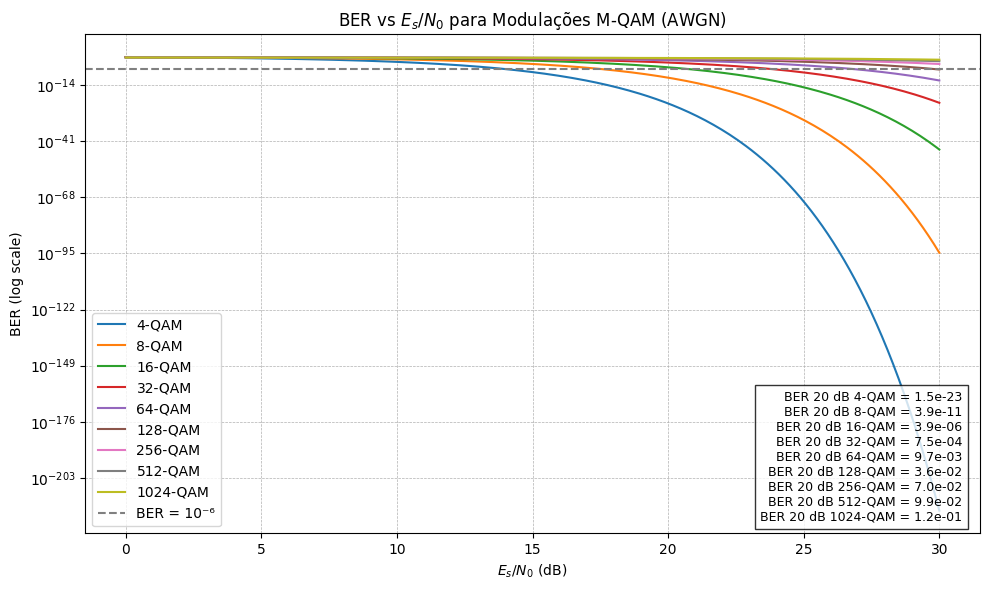

In [5]:
plt.figure(figsize=(10, 6))
EsN0_dB_range = np.linspace(0, 30, 300)
ber_curves = {}
text_lines = []
modulations_to_plot = [4, 8, 16, 32, 64, 128, 256, 512, 1024]

for M in modulations_to_plot:
    k = np.log2(M)
    EsN0_linear_range = 10 ** (EsN0_dB_range / 10)
    EbN0_range = EsN0_linear_range / k
    arg = np.sqrt(3 * k / (M - 1) * EbN0_range)
    ber = (4 / k) * 0.5 * erfc(arg / np.sqrt(2))
    label = f"{M}-QAM"
    ber_curves[label] = ber
    plt.semilogy(EsN0_dB_range, ber, label=label)
    # Calcular BER em 20 dB
    EsN0_20 = 10 ** (20 / 10)
    EbN0_20 = EsN0_20 / k
    arg_20 = np.sqrt(3 * k / (M - 1) * EbN0_20)
    ber_20 = (4 / k) * 0.5 * erfc(arg_20 / np.sqrt(2))
    text_lines.append(f"BER 20 dB {label} = {ber_20:.1e}")

text_block = "\n".join(text_lines)
plt.text(0.98, 0.02, text_block, transform=plt.gca().transAxes,
         fontsize=9, va='bottom', ha='right', bbox=dict(facecolor='white', alpha=0.8))

plt.axhline(y=1e-6, color='gray', linestyle='--', label='BER = 10⁻⁶')
plt.xlabel('$E_s/N_0$ (dB)')
plt.ylabel('BER (log scale)')
plt.title('BER vs $E_s/N_0$ para Modulações M-QAM (AWGN)')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.legend()
plt.tight_layout()
plt.show()

#### Modulações candidatas (com BER ≤ $10^{-6}$) para $E_s/N_0 = 20\,\text{dB}$

| Modulação | Eficiência Espectral (bit/s/Hz) | BER Estimada           | Taxa de Transmissão |
| --------- | ------------------------------- | ---------------------- | ------------------- |
| 4-QAM     | 2                               | $1.52 \times 10^{-23}$ | 20 Mbps             |
| 8-QAM     | 3                               | $3.93 \times 10^{-11}$ | 30 Mbps             |

#### Escolha da modulação

A modulação com **maior eficiência espectral** que respeita a BER limite é:

$$
\boxed{\text{8-QAM}}
$$

#### Frequência da portadora

Como a banda é de 900 a 910 MHz, a frequência central ideal para a portadora é:

$$
f_c = \frac{900 + 910}{2} = \boxed{905\,\text{MHz}}
$$

#### Taxa de transmissão alcançada

$$
R_b = \eta \cdot B = 3 \cdot 10^6 = \boxed{30\,\text{Mbps}}
$$

#### BER resultante com 8-QAM

A BER estimada para 8-QAM com $E_s/N_0 = 20\,\text{dB}$:

$$
\boxed{\text{BER} \approx 3.93 \times 10^{-11}}
$$

#### Conclusão

* **Modulador:** 8-QAM
* **Frequência da portadora:** 905 MHz
* **Taxa de transmissão:** 30 Mbps
* **BER resultante:** $\approx 3.93 \times 10^{-11}$
---

## 6)

Analise a seguinte afirmação:

> "Dentre as técnicas PSK, QAM e FSK, a técnica FSK deve ser escolhida para a transmissão em canais que apresentam elevados níveis de ruído e que necessitam de elevados valores de eficiência espectral."

A afirmativa está correta? Justifique.

---

### Resolução

#### "A técnica FSK deve ser escolhida para canais com elevados níveis de ruído"

**Verdadeiro.**

* A modulação **FSK** (Frequency Shift Keying) possui **símbolos ortogonais**, ou seja, diferentes frequências portadoras que são mais fáceis de distinguir mesmo em ambientes com muito ruído.
* Isso confere ao FSK **maior robustez ao ruído**, especialmente em **FSK ortogonal ou não coerente**.
* Portanto, **em canais ruidosos**, o desempenho do **FSK é superior** ao do PSK ou QAM para uma mesma razão $E_b/N_0$.

#### "... e que necessitam de elevados valores de eficiência espectral"

**Falso.**

* A **eficiência espectral** é dada por:
$$
\eta = \frac{R_b}{B} \quad \text{(bit/s/Hz)}
$$

* A técnica **FSK**, especialmente em sua forma ortogonal, **aumenta a largura de banda com o número de símbolos** (quanto maior o M, maior a separação entre frequências).

* Isso significa que, mesmo transmitindo muitos bits por símbolo, **a largura de banda cresce mais rapidamente**, prejudicando a eficiência espectral.

#### Conclusão

* A **afirmativa está incorreta**.
* Embora a **FSK seja indicada para canais com muito ruído**, **ela não é adequada quando se deseja alta eficiência espectral**.

---

## 7)

Um dado canal de comunicação em banda passante proporciona uma razão $E\_b/N\_0$ de 13 dB. As curvas de **BER** para as modulações QPSK, 8-PSK, 16-PSK, 16-QAM, 64-QAM, 256-QAM e 1024-QAM são apresentadas nas figuras a seguir.

Sabendo que é necessário manter uma **BER máxima** no receptor de $10^{-5}$, determine:

* a) A modulação que deve ser utilizada para obter a **máxima taxa de transmissão**.
* b) A **máxima taxa de transmissão** que pode ser alcançada considerando um canal com **100 kHz** de largura de banda.

---

### Resolução

#### A modulação que deve ser utilizada para obter a **máxima taxa de transmissão**

Para uma mesma largura de banda, a **taxa de transmissão** depende diretamente da **eficiência espectral**, dada por:

$$
\eta = \log_2(M) \quad \text{(bits por símbolo)}
$$

Comparando as modulações que satisfazem o critério de BER:

| Modulação | $M$ | $\log_2 M$ | Eficiência espectral (bit/s/Hz) |
| --------- | --- | ---------- | ------------------------------- |
| QPSK      | 4   | 2          | 2                               |
| 8-PSK     | 8   | 3          | 3                               |
| 16-QAM    | 16  | 4          | 4                               |

A modulação com **maior eficiência espectral** entre as elegíveis é a **16-QAM**.

---

#### A máxima taxa de transmissão que pode ser alcançada com 100 kHz de largura de banda

Sabendo que:

$$
\eta = 4 \, \text{bit/s/Hz} \quad \text{(para 16-QAM)}
$$

e que:

$$
B = 100 \, \text{kHz}
$$

A taxa de transmissão máxima é:

$$
R_b = \eta \cdot B = 4 \cdot 100 \times 10^3 = \boxed{400 \, \text{kbps}}
$$

---

## 8)

Um sinal binário com débito de 100 kbit/s modula em PSK uma portadora com potência de 15 W. O sinal PSK é transmitido por um canal com ruído aditivo gaussiano, de média nula e branco ($N\_0 = 10^{-7}$ W/Hz). No receptor coerente é utilizado um filtro passa-baixo ideal com largura de banda de 80 kHz.

* a) Sabendo que a atenuação do canal é de 20 dB, calcule a **probabilidade de erro**.
* b) Qual a **potência que deve ser transmitida** para se obter uma **probabilidade de erro** de $10^{-5}$?

---

### Resolução

#### A potência recebida considerando atenuação de 20 dB é:

$$
P_r = \frac{P_t}{10^{\frac{20}{10}}} = \frac{15}{100} = 0{,}15 \, \text{W}
$$

Sabendo que a taxa de bits é $R_b = 100 \, \text{kbit/s}$, temos:

$$
E_b = \frac{P_r}{R_b} = \frac{0{,}15}{100 \times 10^3} = 1{,}5 \times 10^{-6} \, \text{J}
$$

$$
\frac{E_b}{N_0} = \frac{1{,}5 \times 10^{-6}}{10^{-7}} = 15
$$

Em dB:

$$
\left( \frac{E_b}{N_0} \right)_{dB} = 10 \log_{10}(15) \approx 11{,}76 \, \text{dB}
$$

Para BPSK:

$$
P_e = Q\left( \sqrt{2 \cdot \frac{E_b}{N_0}} \right) = \frac{1}{2} \, \text{erfc} \left( \sqrt{\frac{E_b}{N_0}} \right)
$$

Substituindo:

$$
P_e = \frac{1}{2} \cdot \text{erfc}\left( \sqrt{2 \cdot 15} \right) \approx \boxed{4{,}74 \times 10^{-15}}
$$

#### Qual a **potência que deve ser transmitida** para se obter uma **probabilidade de erro de** $10^{-5}$

Invertendo a equação da BER para BPSK:

$$
P_e = \frac{1}{2} \cdot \text{erfc}\left( \sqrt{2 \cdot \frac{E_b}{N_0}} \right)
$$

$$
\frac{E_b}{N_0} = \frac{1}{2} \left[ \text{erfc}^{-1}(2 P_e) \right]^2
$$

Para $P_e = 10^{-5}$:

$$
\frac{E_b}{N_0} \approx \frac{1}{2} \left[ \text{erfc}^{-1}(2 \cdot 10^{-5}) \right]^2 \approx 9{,}10
$$

Energia por bit requerida:

$$
E_b = \frac{E_b}{N_0} \cdot N_0 = 9{,}10 \cdot 10^{-7} = 9{,}10 \times 10^{-7} \, \text{J}
$$

Potência recebida necessária:

$$
P_r = E_b \cdot R_b = 9{,}10 \times 10^{-7} \cdot 100 \times 10^3 = 0{,}091 \, \text{W}
$$

Voltando com a atenuação de 20 dB:

$$
P_t = P_r \cdot 10^{\frac{20}{10}} = 0{,}091 \cdot 100 = \boxed{4{,}55 \, \text{W}}
$$

## 9)

Probabilidade de erro de bit e eficiência espectral são importantes para avaliar e comparar o desempenho de diferentes modulações digitais. Para as modulações **M-QAM** e **M-PSK** (com $M > 4$) operando em canais AWGN, afirma-se:

* I - Quanto maior a quantidade de pontos da constelação, maior a eficiência espectral.
* II - Quanto maior a distância mínima da constelação, maior a probabilidade de erro de bit.
* III - Para uma mesma eficiência espectral, a probabilidade de erro de bit da modulação **M-QAM** é menor do que a da **M-PSK**.

**Indique quais afirmações são verdadeiras** e **justifique as falsas**.

---

### Resolução

#### Afirmativa I

**Verdadeira**

* A **eficiência espectral** é dada por:

  $$
  \eta = \log_2(M) \, \text{bit/símbolo}
  $$

* Portanto, quando se **aumenta M**, mais bits são transmitidos por símbolo.

* Exemplo:

  * 8-PSK: 3 bits/símbolo
  * 16-QAM: 4 bits/símbolo
  * 64-QAM: 6 bits/símbolo

#### Afirmativa II

**Falsa**

* A **distância mínima entre pontos da constelação** afeta diretamente a probabilidade de erro: quanto **menor** a distância, **maior** a probabilidade de um símbolo ser confundido com o vizinho.

* Portanto, ao **aumentar a distância mínima**, os pontos ficam mais separados, e o sistema torna-se **mais robusto ao ruído**.

#### Afirmativa III

**Verdadeira**

* Para uma mesma eficiência espectral, a **M-QAM** apresenta **melhor desempenho em BER** comparado à **M-PSK**, pois:

  * Os pontos da constelação **QAM** são dispostos em uma **grade bidimensional**, otimizando o uso do espaço do plano complexo e mantendo **maior distância mínima**.
  * Já na **M-PSK**, os pontos estão sobre uma **circunferência**, e a distância mínima entre eles cai mais rapidamente com o aumento de M.
  * Portanto, para uma mesma eficiência espectral, a **M-QAM** apresenta **melhor desempenho em BER** comparado à **M-PSK**.

## Conclusão

| Afirmativa | Veracidade   | Justificativa                                      |
| ---------- | ------------ | -------------------------------------------------- |
| I          | Verdadeira | Mais pontos → mais bits por símbolo                |
| II         | Falsa      | Maior distância → menor BER                        |
| III        | Verdadeira | M-QAM tem menor BER que M-PSK com mesma eficiência |

---

## 10)

Sabe-se que um canal apresenta $N\_0 = 1$ W/Hz. Calcule a energia média e a largura de faixa ocupada para que cada uma das modulações abaixo possa ser empregada para transmitir um sinal de 1 Mbps com desempenho de aproximadamente 1 bit errado a cada 10.000 bits transmitidos:

* a) 4-QAM
* b) 8-QAM
* c) 16-QAM
* d) 32-QAM
* e) 64-QAM

### Resolução

$$
\text{BER} \approx \frac{4}{\log_2 M} \cdot Q\left( \sqrt{ \frac{3 \log_2 M}{M - 1} \cdot \frac{E_b}{N_0} } \right)
$$

Invertendo a fórmula, obtemos:

$$
\frac{E_b}{N_0} = \left[ Q^{-1} \left( \frac{\text{BER} \cdot \log_2 M}{4} \right) \right]^2 \cdot \frac{M - 1}{3 \log_2 M}
$$

In [6]:
# Parâmetros da questão
Rb = 1e6  # 1 Mbps
BER_target = 1e-4  # 1 bit errado a cada 10.000
N0 = 1  # W/Hz

qam_orders = [4, 8, 16, 32, 64]
results = []

for M in qam_orders:
    k = np.log2(M)
    # BER ≈ (4/log2(M)) * Q(sqrt(3*log2(M)/(M-1) * Eb/N0))
    # Inversão aproximada:
    # Eb/N0 = [(erfcinv(BER * log2(M) / 2) / sqrt(3 / (M-1)))^2]

    q_arg = BER_target * k / 2
    Qinv = erfcinv(2 * q_arg)
    EbN0 = (Qinv**2) * (M - 1) / (3 * k)

    # Energia média por símbolo: Es = Eb * k
    Eb = EbN0 * N0
    Es = Eb * k

    # Rs = Rb / k → largura de banda aproximada para QAM: B ≈ Rs = Rb / log2(M)
    BW = Rb / k

    results.append({
        "Modulação": f"{int(M)}-QAM",
        "Eficiência Espectral (bit/s/Hz)": k,
        "Eb/N0 (linear)": EbN0,
        "Energia média por bit (J)": Eb,
        "Energia média por símbolo (J)": Es,
        "Largura de banda (Hz)": BW
    })

# Print results as table
print(tabulate.tabulate(results, headers="keys", tablefmt="grid"))

+-------------+-----------------------------------+------------------+-----------------------------+---------------------------------+-------------------------+
| Modulação   |   Eficiência Espectral (bit/s/Hz) |   Eb/N0 (linear) |   Energia média por bit (J) |   Energia média por símbolo (J) |   Largura de banda (Hz) |
+=============+===================================+==================+=============================+=================================+=========================+
| 4-QAM       |                                 2 |          3.45777 |                     3.45777 |                         6.91554 |                  500000 |
+-------------+-----------------------------------+------------------+-----------------------------+---------------------------------+-------------------------+
| 8-QAM       |                                 3 |          5.08293 |                     5.08293 |                        15.2488  |                  333333 |
+-------------+-------------------

#### a) **4-QAM**

* $\log_2 M = 2$
* $\frac{E_b}{N_0} \approx 3.46$
* $E_b \approx 3.46 \, \text{J}$
* $E_s = E_b \cdot 2 \approx 6.92 \, \text{J}$
* $B \approx \frac{1 \, \text{Mbps}}{2} = 500 \, \text{kHz}$

#### b) **8-QAM**

* $\log_2 M = 3$
* $\frac{E_b}{N_0} \approx 5.08$
* $E_b \approx 5.08 \, \text{J}$
* $E_s \approx 15.25 \, \text{J}$
* $B \approx \frac{1 \, \text{Mbps}}{3} \approx 333.33 \, \text{kHz}$

#### c) **16-QAM**

* $\log_2 M = 4$
* $\frac{E_b}{N_0} \approx 7.83$
* $E_b \approx 7.83 \, \text{J}$
* $E_s \approx 31.33 \, \text{J}$
* $B = \frac{1 \, \text{Mbps}}{4} = 250 \, \text{kHz}$

#### d) **32-QAM**

* $\log_2 M = 5$
* $\frac{E_b}{N_0} \approx 12.52$
* $E_b \approx 12.52 \, \text{J}$
* $E_s \approx 62.60 \, \text{J}$
* $B = \frac{1 \, \text{Mbps}}{5} = 200 \, \text{kHz}$

#### e) **64-QAM**

* $\log_2 M = 6$
* $\frac{E_b}{N_0} \approx 20.61$
* $E_b \approx 20.61 \, \text{J}$
* $E_s \approx 123.65 \, \text{J}$
* $B = \frac{1 \, \text{Mbps}}{6} \approx 166.67 \, \text{kHz}$

---

## 11)

Deseja-se implementar um sistema de transmissão digital com taxa de transmissão de 9600 bps em um canal com faixa disponível de 4 kHz.

**O esquema de modulação digital que, operando em condições ótimas, atende ao sistema a ser implementado sem que haja distorção do sinal transmitido é o:**

* a) 8-PSK
* b) 8-FSK
* c) 4-PSK
* d) BFSK
* e) BPSK

---

### Resolução

A **eficiência espectral** da modulação, que relaciona a taxa de bits com a largura de banda ocupada, é dada por:

$$
\eta = \frac{R_b}{B} \quad \text{(bit/s/Hz)}
$$

Para esse problema:

$$
\eta = \frac{9600}{4000} = 2.4 \, \text{bit/s/Hz}
$$

#### **8-PSK**

* Cada símbolo transmite $\log_2(8) = 3$ bits.

* Com modulação linear (sem codificação), taxa de símbolo:

  $$
  R_s = \frac{9600}{3} = 3200 \, \text{baud}
  $$

* Largura de banda aproximada (com filtro de Nyquist):

  $$
  B \approx R_s = 3200 \, \text{Hz} \leq 4000 \, \text{Hz}
  $$

**Viável**

#### **8-FSK**

* Para evitar interferência entre tons, **FSK ortogonal** exige:

  $$
  B \approx M \cdot R_s = 8 \cdot 1200 = 9600 \, \text{Hz}
  $$

* Isso **excede a faixa de 4 kHz**.

**Não viável**

#### **4-PSK (QPSK)**

* $\log_2(4) = 2$ bits/símbolo
* $R_s = 9600 / 2 = 4800 \, \text{baud}$
* $B \approx R_s = 4800 \, \text{Hz} > 4000 \, \text{Hz}$

**Marginalmente inviável** (excederia o canal)

#### **BFSK**

* Ocupa aproximadamente o dobro da taxa de bits:

  $$
  B \approx 2 \cdot R_b = 19200 \, \text{Hz}
  $$

**Muito além da faixa disponível**

#### **BPSK**

* Para BPSK com pulso retangular: $B \approx R_b = 9600 \, \text{Hz}$

**Também excede os 4 kHz**

#### Conclusão

A única modulação entre as opções que **atende à taxa de 9600 bps** e **respeita os 4 kHz de banda disponível**, **sem causar distorção**, é a:

$$
\boxed{\text{a) 8-PSK}}
$$

---

## 12)

O transmissor **X** envia informações para o receptor **Y** utilizando um dos seguintes canais: **A**, **B** ou **C**. Os canais A, B e C são independentes, possuem a mesma largura de banda e empregam as modulações **BPSK**, **16-QAM** e **64-QAM**, respectivamente. Independentemente do canal empregado, as informações são enviadas em blocos de mesma quantidade de símbolos.

Sabendo-se que um levantamento estatístico revelou que:

* 30% dos pacotes são transmitidos pelo canal A
* 50% pelo canal B
* 20% pelo canal C

**Calcule o fluxo de informação de X para Y, expresso em bits por segundo por Hertz.**

---

### Resolução

Eficiência espectral para cada modulação:

* BPSK: $0.5 \text{ bit/s/Hz}$
* 16-QAM: $log_2(16) = 4 \text{ bit/s/Hz}$
* 64-QAM: $log_2(64) = 6 \text{ bit/s/Hz}$

Fluxo de informação de X para Y:

* **30%** dos pacotes são transmitidos pelo canal A: $0.3 * 0.5 = 0.15 \text{ bit/s/Hz}$
* **50%** pelo canal B: $0.5 * 4 = 2 \text{ bit/s/Hz}$
* **20%** pelo canal C: $0.2 * 6 = 1.2 \text{ bit/s/Hz}$

#### Fluxo de informação total:

$0.15 + 2 + 1.2 = 3.35 \text{ bit/s/Hz}$

---